In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy
from scipy.stats import beta, binom, entropy
import random
import json
import copy
import math
import pickle
import statistics
from scipy import stats

# my modules
import scientist
import evaluation
import helper
import settings
import publisher

In [2]:
# global variables
num_bins = 15
num_draws = 10
num_participants = 10
num_generations = 30

# distribution of bins
bins_to_probs = {}
for i in range(0, num_bins):
    bins_to_probs[i] = np.random.uniform(low=0.0, high=1.0)

In [3]:
def make_participants(setting, alpha_value):
    participants = []

    for i in range (0, num_participants):
        if setting == "rate":
            report_set = settings.ReportingSetting("rate")
        elif setting == "data":
            report_set = settings.ReportingSetting("data")
        elif setting == "subset":
            report_set = settings.ReportingSetting("subset")

        # make participant
        participant = scientist.Participant(alpha=alpha_value, reporting_setting=report_set)
                        
        participants.append(participant)

    return(participants)

In [4]:
def run_experiment_over_exploration(setting, alpha_value, rel_pl_data_val, rel_pl_surprise_val, rel_pl_bias_val):
    scientific_record = {}
    for bin_num in range(0, num_bins):
        scientific_record[bin_num] = {} 
        scientific_record[bin_num][0] = 1
        scientific_record[bin_num][1] = 1
        
    num_reports_per_bin = {}
    for bin_num in range(0, num_bins):
        num_reports_per_bin[bin_num] = 0
    
    for generation in range(0, num_generations):       
        # each generation gets an entirely new set of participants
        participants = make_participants(setting, alpha_value)

        # scientists explore and submit reports
        for participant in participants:
            # sample
            for i in range(0, num_draws):
                bin_number, value = participant.sample(scientific_record, num_bins, bins_to_probs)

            # choose the bin
            bin_choice = participant.choose_bin(scientific_record, num_bins, num_draws)

            # make a report
            participant.report(num_bins, num_draws)
            
        # the peer review board selects reports for publication and returns the updated scientific record
        scientific_record, num_new, num_reports_per_bin = publisher.peer_review_over_exploration(participants, scientific_record, rel_pl_data_val, rel_pl_surprise_val, rel_pl_bias_val, num_draws, num_reports_per_bin)
    
    return(evaluation.arm_parameter_score(scientific_record, bins_to_probs), evaluation.total_entropy_score(scientific_record, bins_to_probs), num_reports_per_bin)

In [12]:
number_of_iterations = 100

num_reports_per_bin_avg = {}
for i in range(0, num_bins):
    num_reports_per_bin_avg[i] = []

for i in range(0, number_of_iterations):
    print(i)
    _, _, curr = run_experiment_over_exploration("data", 0, 1, 0, 0)
    for key in curr:
        num_reports_per_bin_avg[key].append(curr[key])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [13]:
num_reports_per_bin_avg_twice = {}
for key in num_reports_per_bin_avg:
    num_reports_per_bin_avg_twice[key] = [sum(num_reports_per_bin_avg[key]) / len(num_reports_per_bin_avg[key]), stats.sem(num_reports_per_bin_avg[key])]

In [24]:
number_of_iterations = 100

num_reports_per_bin_avg_surprise = {}
for i in range(0, num_bins):
    num_reports_per_bin_avg_surprise[i] = []

for i in range(0, number_of_iterations):
    print(i)
    _, _, curr = run_experiment_over_exploration("data", 0, 0, 1, 0)
    for key in curr:
        num_reports_per_bin_avg_surprise[key].append(curr[key])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [25]:
num_reports_per_bin_avg_twice_surprise = {}
for key in num_reports_per_bin_avg_surprise:
    num_reports_per_bin_avg_twice_surprise[key] = [sum(num_reports_per_bin_avg_surprise[key]) / len(num_reports_per_bin_avg_surprise[key]), stats.sem(num_reports_per_bin_avg_surprise[key])]

In [29]:
number_of_iterations = 100

num_reports_per_bin_avg_positive = {}
for i in range(0, num_bins):
    num_reports_per_bin_avg_positive[i] = []

for i in range(0, number_of_iterations):
    print(i)
    _, _, curr = run_experiment_over_exploration("data", 0, 0, 0, 1)
    for key in curr:
        num_reports_per_bin_avg_positive[key].append(curr[key])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [30]:
num_reports_per_bin_avg_twice_positive = {}
for key in num_reports_per_bin_avg_positive:
    num_reports_per_bin_avg_twice_positive[key] = [sum(num_reports_per_bin_avg_positive[key]) / len(num_reports_per_bin_avg_positive[key]), stats.sem(num_reports_per_bin_avg_positive[key])]

In [31]:
x = []

for bin_no in num_reports_per_bin_avg:
    x.append(bin_no)


y = []
y_surprise = []
y_positive = []
for gen_no in num_reports_per_bin_avg:
    y.append(num_reports_per_bin_avg_twice[gen_no][0])
    y_surprise.append(num_reports_per_bin_avg_twice_surprise[gen_no][0])
    y_positive.append(num_reports_per_bin_avg_twice_positive[gen_no][0])

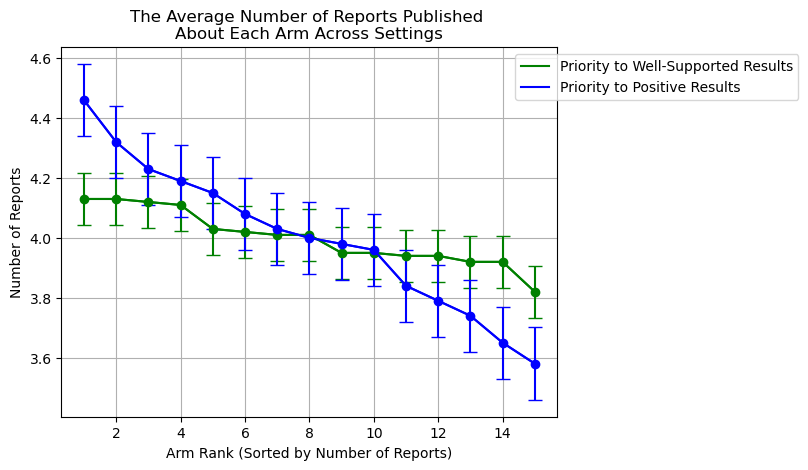

In [33]:
# Sort the data based on y-values
sorted_data = sorted(zip(x, y), key=lambda pair: pair[1], reverse=True)
sorted_x, sorted_y = zip(*sorted_data)

sorted_data_surprise = sorted(zip(x, y_surprise), key=lambda pair: pair[1], reverse=True)
_, sorted_y_surprise = zip(*sorted_data_surprise)

sorted_data_positive = sorted(zip(x, y_positive), key=lambda pair: pair[1], reverse=True)
_, sorted_y_positive = zip(*sorted_data_positive)

# Calculate ranks
ranks = range(1, len(sorted_x) + 1)

# Plot the sorted data with ranks on the x-axis
plt.plot(ranks, sorted_y, label="Priority to Well-Supported Results", color="green")
plt.errorbar(ranks, sorted_y, num_reports_per_bin_avg_twice[gen_no][1], fmt='-o', capsize=5, color="green")
# plt.plot(ranks, sorted_y_surprise, label="Priority to Surprising Results", color="orange")
# plt.errorbar(ranks, sorted_y_surprise, num_reports_per_bin_avg_twice_surprise[gen_no][1], fmt='-o', capsize=5, color="orange")
plt.plot(ranks, sorted_y_positive, label="Priority to Positive Results", color="blue")
plt.errorbar(ranks, sorted_y_positive, num_reports_per_bin_avg_twice_positive[gen_no][1], fmt='-o', capsize=5, color="blue")


# Labeling and styling
plt.xlabel('Arm Rank (Sorted by Number of Reports)')
plt.ylabel('Number of Reports')
plt.title('The Average Number of Reports Published \nAbout Each Arm Across Settings')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))
plt.grid(True)

# Save and show the plot
plt.savefig('graphics/qualitative_avg_reports.pdf', format='pdf', bbox_inches='tight')
plt.show()